Test Loss: 0.656, Test Accuracy: 72.00%
Train Loss: 0.899
Test Loss: 0.683, Test Accuracy: 65.00%
Train Loss: 0.625
Test Loss: 0.584, Test Accuracy: 75.00%
Train Loss: 0.571
Test Loss: 0.571, Test Accuracy: 75.00%
Train Loss: 0.557
Test Loss: 0.552, Test Accuracy: 75.00%
Train Loss: 0.533
Test Loss: 0.561, Test Accuracy: 75.00%
Train Loss: 0.503
Test Loss: 0.544, Test Accuracy: 75.00%
Train Loss: 0.463
Test Loss: 0.527, Test Accuracy: 75.00%
Train Loss: 0.412
Test Loss: 0.545, Test Accuracy: 75.00%
Train Loss: 0.390
Test Loss: 0.537, Test Accuracy: 69.50%
Train Loss: 0.352
Test Loss: 0.718, Test Accuracy: 58.50%
Train Loss: 0.334
Test Loss: 0.537, Test Accuracy: 71.00%
Train Loss: 0.303
Test Loss: 0.594, Test Accuracy: 66.50%
Train Loss: 0.268
Test Loss: 0.682, Test Accuracy: 72.50%
Train Loss: 0.239
Test Loss: 0.607, Test Accuracy: 70.00%
Train Loss: 0.214
Test Loss: 0.610, Test Accuracy: 71.50%
Train Loss: 0.198
Test Loss: 0.926, Test Accuracy: 57.00%
Train Loss: 0.194
Test Loss: 0.6

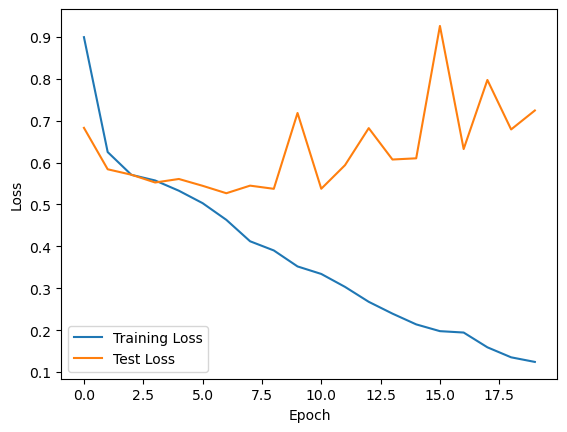

ValueError: cannot reshape array of size 6400 into shape (60,60)

In [29]:
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import random

# Define the folder containing the images and the Excel file with the labels
train_image_folder = 'C:/Users/ergoe/Downloads/FIVES_train/FIVES A Fundus Image Dataset for AI-based Vessel Segmentation/train/Ground truth'
test_image_folder = 'C:/Users/ergoe/Downloads/test/test/Ground truth'
# train_excel_file = 'C:/Users/ergoe/OneDrive/Documents/FIVES_label.xlsx'  (uncomment for 4 categories)
train_excel_file = 'C:/Users/ergoe/OneDrive/Documents/FIVES_label_simple.xlsx' # comment out for 4 categories
# test_excel_file = 'C:/Users/ergoe/OneDrive/Documents/fives_label_test.xlsx' (uncomment for 4 categories)
test_excel_file = 'C:/Users/ergoe/OneDrive/Documents/fives_label_test_simple.xlsx' # comment out for 4 categories

# runs the code that loads images and labels
%run loading_code.ipynb
# runs the neural network architecture code
%run neural_network_architecture.ipynb
# runs the training model code
%run train_model.ipynb
# runs the test code
%run test_model.ipynb

# Load the train data
train_dataset = load_data(train_image_folder, train_excel_file)
train_images, train_labels = train_dataset

#Load the test data
test_dataset = load_data(test_image_folder, test_excel_file)
test_images, test_labels = test_dataset

# Convert string labels to numeric values
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)

test_labels_string = le.inverse_transform(test_labels)

# Define the neural network architecture
model = create_model()

# Train the model and get the losses
train_loader = DataLoader(list(zip(train_images, train_labels)), batch_size=16, shuffle=True)

# Run the test model and get the losses
test_loader = DataLoader(list(zip(test_images, test_labels)), batch_size=16, shuffle=True)
test_loss = test_model(model, test_loader)
epoch_losses, test_losses = train_model(model, train_loader, test_loader, epochs=20)

# plot the losses of the model
plt.plot(epoch_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get a random index for a test image
index = random.randint(0, len(test_images)-1)

# Get the corresponding image and label
test_image = test_images[index]
test_label = test_labels_string[index]

# Get the predicted label from the model
model.eval()
with torch.no_grad():
    output = model(torch.tensor(test_image).unsqueeze(0).float())
predicted_label = output.argmax(dim=1).item()

# Display the image and print the true and predicted labels
test_image_plot = test_image.reshape(60, 60)
plt.imshow(test_image_plot, cmap='gray')
plt.title(f'True Label: {test_label}, Predicted Label: {predicted_label}')
plt.show()